In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg

In [48]:
im_gray_16 = cv2.imread("000369_depth.png", cv2.IMREAD_UNCHANGED)
max_v = np.max(im_gray_16)
print('max_v = ',max_v)
scale = 255./max_v
print('scale = ', scale)
im_gray_8 = im_gray_16 * scale
im_gray = np.array(im_gray_8, dtype=np.uint8)
# im_gray = cv2.imread("000369_depth.png", cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(im_gray)
out_img = im_gray# equ # cv2.cvtColor(im_gray, cv2.COLOR_GRAY2RGB)
# im_color = cv2.applyColorMap(out_img, cv2.COLORMAP_JET)
im_color = cv2.applyColorMap(out_img, cv2.COLORMAP_RAINBOW)




('max_v = ', 65535)
('scale = ', 0.0038910505836575876)


In [52]:
def hist_proc(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

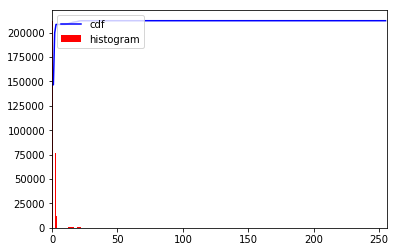

In [53]:
hist_proc(im_gray)

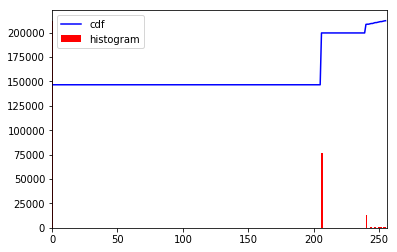

In [54]:
hist_proc(equ)

In [49]:
im_color = cv2.cvtColor(im_color, cv2.COLOR_RGB2BGR)
cv2.imwrite("psudo_color.png", im_color)
# plt.imshow(im_color)
# plt.savefig('analysis.png', bbox_inches = 'tight')
# plt.show()

True

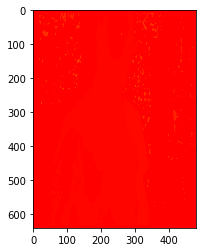

In [50]:
img = cv2.resize(im_color,im_gray.shape,interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.xlim(0, img.shape[1])
plt.ylim(img.shape[0], 0)
# plt.savefig('psudo.png', bbox_inches = 'tight')
plt.show()